<a href="https://colab.research.google.com/github/Chloe0704/Recommendation/blob/master/Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Recommendations


##Ingest

####Connect Kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liumeilin","key":"674d2af5534035649b043f4efe918826"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


####Load Netflix Data

In [0]:
!kaggle datasets download -d netflix-inc/netflix-prize-data

100% 680M/682M [00:08<00:00, 71.7MB/s]
100% 682M/682M [00:08<00:00, 80.3MB/s]


In [0]:
!unzip \*.zip

Archive:  netflix-prize-data.zip
  inflating: README                  
  inflating: combined_data_1.txt     
  inflating: combined_data_2.txt     
  inflating: combined_data_3.txt     
  inflating: combined_data_4.txt     
  inflating: movie_titles.csv        
  inflating: probe.txt               
  inflating: qualifying.txt          


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df1 = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df2 = pd.read_csv('combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df3 = pd.read_csv('combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df4 = pd.read_csv('combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


df1['Rating'] = df1['Rating'].astype(float)
df2['Rating'] = df2['Rating'].astype(float)
df3['Rating'] = df3['Rating'].astype(float)
df4['Rating'] = df4['Rating'].astype(float)

print('Dataset 1 shape: {}'.format(df1.shape))
print('Dataset 2 shape: {}'.format(df2.shape))
print('Dataset 3 shape: {}'.format(df3.shape))
print('Dataset 4 shape: {}'.format(df4.shape))

Dataset 1 shape: (24058263, 2)
Dataset 2 shape: (26982302, 2)
Dataset 3 shape: (22605786, 2)
Dataset 4 shape: (26851926, 2)


In [0]:
df_full = df1
df_full = df1.append(df2)
df_full = df_full.append(df3)
df_full = df_full.append(df4)

df_full.index = np.arange(0,len(df_full))
print('Full dataset shape: {}'.format(df_full.shape))
print('-Dataset examples-')
print(df_full.iloc[::5000000, :])

Full dataset shape: (100498277, 2)
-Dataset examples-
           Cust_Id  Rating
0               1:     NaN
5000000    2560324     4.0
10000000   2271935     2.0
15000000   1921803     2.0
20000000   1933327     3.0
25000000   1465002     3.0
30000000    961023     4.0
35000000   1372532     5.0
40000000    854274     5.0
45000000    116334     3.0
50000000    768483     3.0
55000000   1331144     5.0
60000000   1609324     2.0
65000000   1699240     3.0
70000000   1776418     4.0
75000000   1643826     5.0
80000000    932047     4.0
85000000   2292868     4.0
90000000    932191     4.0
95000000   1815101     3.0
100000000   872339     4.0


In [0]:
#seperately read data
df1 = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df1['Rating'] = df1['Rating'].astype(float)

In [0]:
df1.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


##EDA

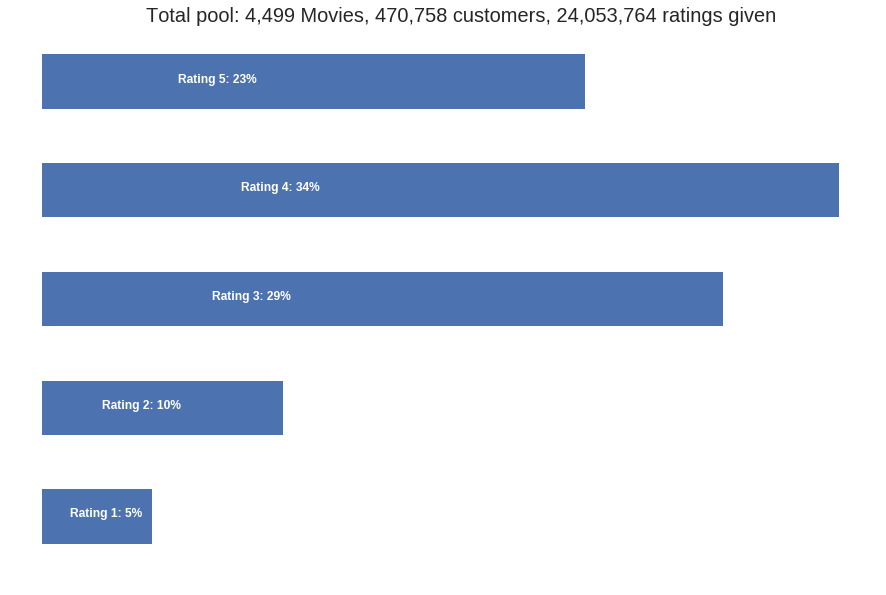

In [0]:
df = df1
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

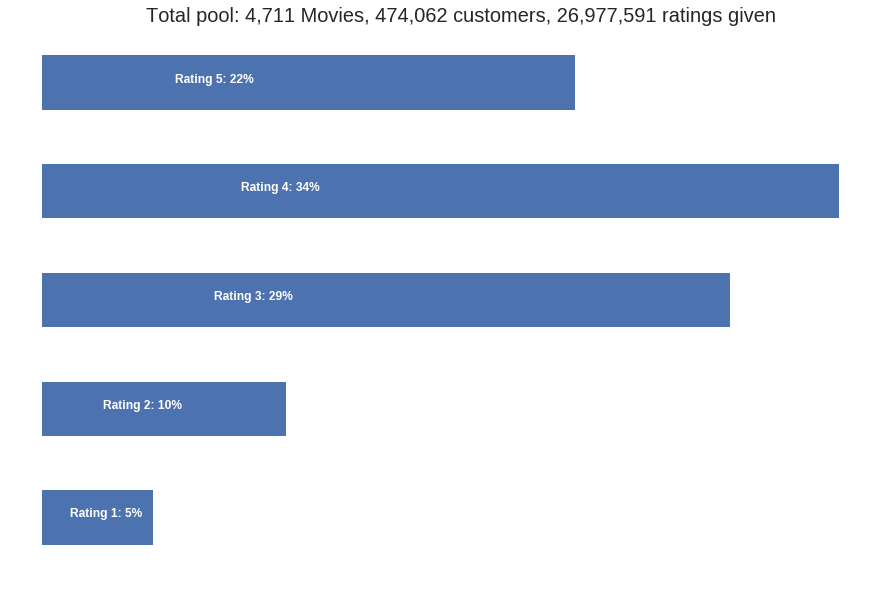

In [0]:

p = df2.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df2.isnull().sum()[1]

# get customer count
cust_count = df2['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df2['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

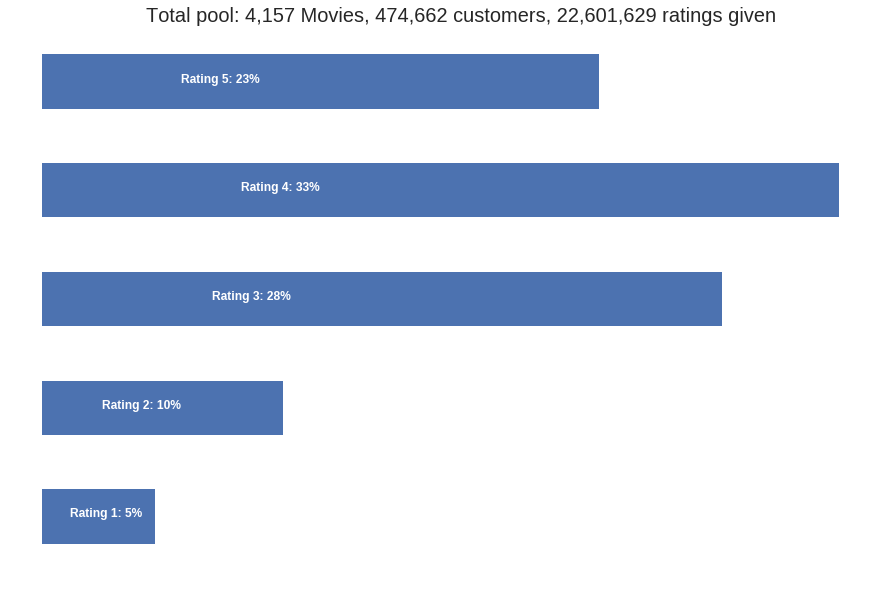

In [0]:

p = df3.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df3.isnull().sum()[1]

# get customer count
cust_count = df3['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df3['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

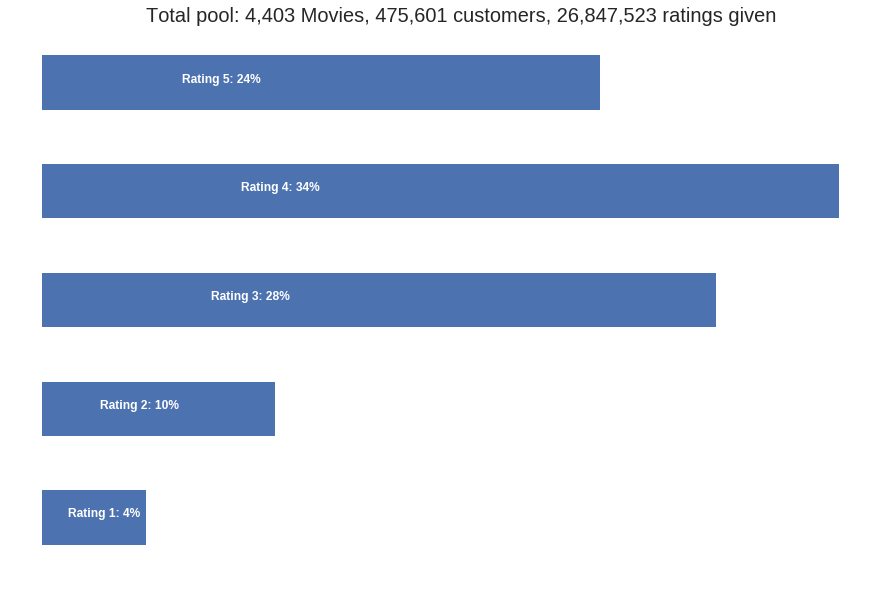

In [0]:

p = df4.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df4.isnull().sum()[1]

# get customer count
cust_count = df4['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df4['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

##Modeling

####Form Movie ID

In [0]:
df = df1
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1


last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [0]:
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


####Remove not popular movie and inactive user

In [0]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.8),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 3884.0
Customer minimum times of review: 79.0


In [0]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::5000000, :])

Original Shape: (24053764, 3)
After Trim Shape: (13528427, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
5109       785314     1.0         8
8889698    332300     3.0      1770
17751978   629874     4.0      3391


####Surprise SVD

In [0]:
!pip install -q scikit-surprise

    100% |████████████████████████████████| 3.3MB 6.5MB/s 


In [0]:
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBaseline

In [0]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 3-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8441  0.8451  0.8448  0.8447  0.0004  
MAE (testset)     0.6578  0.6579  0.6577  0.6578  0.0001  
Fit time          761.73  765.06  760.08  762.29  2.07    
Test time         127.29  110.15  117.56  118.34  7.02    


{'fit_time': (761.7260460853577, 765.0624496936798, 760.0770742893219),
 'test_mae': array([0.65775115, 0.65794187, 0.65771179]),
 'test_rmse': array([0.84411389, 0.84514798, 0.84476781]),
 'test_time': (127.29419684410095, 110.15293049812317, 117.56351661682129)}

####Read Movie and Raw ID File 

In [0]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


####Recommendation for Certain User

In [0]:
df_2647871 = df[(df['Cust_Id'] == 2647871) & (df['Rating'] == 5)]
df_2647871 = df_2647871.set_index('Movie_Id')
df_2647871 = df_2647871.join(df_title)['Name']
print(df_2647871)

Movie_Id
361             The Phantom of the Opera: Special Edition
494     Monty Python's The Meaning of Life: Special Ed...
752              Star Trek: The Next Generation: Season 7
907                                       Animal Crackers
1552                                          Black Adder
1756                         Murder on the Orient Express
1905    Pirates of the Caribbean: The Curse of the Bla...
2040             Star Trek: The Next Generation: Season 5
2452        Lord of the Rings: The Fellowship of the Ring
2465                                   This Is Spinal Tap
2862                             The Silence of the Lambs
2944                                          Hoop Dreams
3523             Star Trek: The Next Generation: Season 6
Name: Name, dtype: object


In [0]:
user_2647871 = df_title.copy()
user_2647871 = user_2647871.reset_index()
user_2647871 = user_2647871[~user_2647871['Movie_Id'].isin(drop_movie_list)]


user_2647871['Estimate_Score'] = user_2647871['Movie_Id'].apply(lambda x: algo.predict(2647871, x).est)

user_2647871 = user_2647871.drop('Movie_Id', axis = 1)

user_2647871 = user_2647871.sort_values('Estimate_Score', ascending=False)
print(user_2647871.head(10))

        Year                                      Name  Estimate_Score
2531  1999.0                          Futurama: Vol. 1        4.962125
2171  1991.0                    The Simpsons: Season 3        4.861561
3443  2004.0     Family Guy: Freakin' Sweet Collection        4.784276
2101  1994.0                    The Simpsons: Season 6        4.763858
4114  1999.0                   The Simpsons: Bart Wars        4.616619
1019  1989.0                    The Simpsons: Season 1        4.591832
3045  1990.0         The Simpsons: Treehouse of Horror        4.532425
721   2003.0                        The Wire: Season 1        4.512080
2039  1991.0  Star Trek: The Next Generation: Season 5        4.484954
4426  2001.0                   The West Wing: Season 3        4.477730


####Recommend Similar Movies

In [0]:
# First, train the algorithm to compute the similarities between items
#data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algk = KNNBaseline(sim_options=sim_options)
algk.fit(trainset)



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
mov = df_title[df_title['Name']=='The Silence of the Lambs']
mov

,Year,Name
Movie_Id,,
2862,1991.0,The Silence of the Lambs


In [0]:
# Retrieve inner id of the movie The Silence of the Lambsy
Lamb_inner_id = algk.trainset.to_inner_iid(2862)

# Retrieve inner ids of the nearest neighbors of Toy Story.
Lamb_neighbors = algk.get_neighbors(Lamb_inner_id, k=3)

In [0]:
Lamb_neighbors = (algk.trainset.to_raw_iid(inner_id) for inner_id in Lamb_neighbors)
a = list(Lamb_neighbors)
a

[798, 3290, 2430]

In [0]:
lamb = df_title[df_title.index.isin(a)]

lamb

,Year,Name
Movie_Id,,
798,1975.0,Jaws
2430,1979.0,Alien: Collector's Edition
3290,1974.0,The Godfather


##Conclusion

1. For existing users, who have recorded preference for those movies, using SVD from surprise can find the movies similar to movies that the user rating high in the past.

  For example, the user #2647871 gave high rates to "*The Phantom of the Opera"*, *"Black Adder"* and *"Animal Crackers"*; then next time "*Futurama*", "*The Simpsons*" and "*Family Guy*" may appear on the user's page. 

2. For new users, who do not have recorded data, KNN can help to find the similar movies to what the user is currently viewing on the page. 
 
 For example, if someone is viewing the page of "*The Silence of the Lambs (1991)*", then on the same page, "*Jaws*", "*Alien: Collector's Edition*" and "*The Godfather*" may appear.
 
3. Although the more data the more accurate the model will be, large amount of data requires too much resources, even the RAM cannot hold that much data. So it is important to filter the data better and keep high quality records to make the model building process more efficient.